# 기계학습 특강 (4주차) 9월28일 
> 딥러닝의 기초 - 회귀분석(2)--step1~4, step1의 다른표현, step4의 다른표현, 로지스틱 intro 

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [Special Topics in Machine Learning]

## imports

In [213]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import torch

## numpy, torch (선택학습)

### numpy, torch는 엄청 비슷해요 

`-` torch.tensor() = np.array() 처럼 생각해도 무방 

In [214]:
np.array([1,2,3]), torch.tensor([1,2,3])

(array([1, 2, 3]), tensor([1, 2, 3]))

`-` 소수점의 정밀도에서 차이가 있음 (torch가 좀 더 쪼잔함) 

In [215]:
np.array([3.123456789])

array([3.12345679])

In [216]:
torch.tensor([3.123456789])

tensor([3.1235])

tensor는 gpu에 저장하기 때문에 메모리 아끼기 위해 정밀도가 낮은 경향이 있다.

`-` 기본적인 numpy 문법은 np 대신에 torch를 써도 무방 // 완전 같지는 않음 

In [217]:
np.arange(10), torch.arange(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [218]:
np.linspace(0,1,10), torch.linspace(0,1,10)

(array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
 tensor([0.0000, 0.1111, 0.2222, 0.3333, 0.4444, 0.5556, 0.6667, 0.7778, 0.8889,
         1.0000]))

In [219]:
np.random.randn(10)

array([-2.04307368, -1.43344361, -0.53407612, -0.94061334,  1.12391347,
        0.87837938, -0.78230893,  0.73597169, -0.4349671 , -0.28539105])

In [220]:
torch.randn(10)

tensor([-1.5503, -1.9399,  1.2090,  0.5242,  0.3905, -0.5655,  0.8306,  0.6349,
         0.8350,  0.3871])

### length $n$ vector, $n \times 1$ col-vector, $1 \times n$ row-vector 

브로드캐스팅 길이가 3인 벡터와 1인벡터를 더하면 오류 뜨지 않고 더해줌

`-` 길이가 3인 벡터 선언방법 

In [9]:
a = torch.tensor([1,2,3])
a.shape

torch.Size([3])

`-` 3x1 col-vec 선언방법 

(방법1)

In [10]:
a = torch.tensor([[1],[2],[3]])
a.shape

torch.Size([3, 1])

(방법2)

In [11]:
a = torch.tensor([1,2,3]).reshape(3,1)
a.shape

torch.Size([3, 1])

`-` 1x3 row-vec 선언방법 

(방법1)

In [12]:
a = torch.tensor([[1,2,3]])
a.shape

torch.Size([1, 3])

(방법2)

In [13]:
a = torch.tensor([1,2,3]).reshape(1,3)
a.shape

torch.Size([1, 3])

`-` 3x1 col-vec 선언방법, 1x3 row-vec 선언방법에서 `[[1],[2],[3]]` 혹은 `[[1,2,3]]` 와 같은 표현이 이해안되면 아래링크로 가셔서 

https://guebin.github.io/STBDA2022/2022/03/14/(2주차)-3월14일.html

첫번째 동영상 12:15 - 22:45 에 해당하는 분량을 학습하시길 바랍니다. 

### torch의 dtype

`-` 기본적으로 torch는 소수점으로 저장되면 dtype=torch.float32 가 된다. (이걸로 맞추는게 편리함) 

In [ ]:
tsr = torch.tensor([1.23,2.34])
tsr

tensor([1.2300, 2.3400])

In [ ]:
tsr.dtype

torch.float32

`-` 정수로 선언하더라도 dtype를 torch.float32로 바꾸는게 유리함 

(안 좋은 선언예시) 

In [ ]:
tsr = torch.tensor([1,2])
tsr 

tensor([1, 2])

In [ ]:
tsr.dtype

torch.int64

(좋은 선언예시1) 

In [ ]:
tsr = torch.tensor([1,2],dtype=torch.float32)
tsr 

tensor([1., 2.])

In [ ]:
tsr.dtype

torch.float32

(좋은 선언예시2) 

In [ ]:
tsr = torch.tensor([1,2.0])
tsr 

tensor([1., 2.])

In [ ]:
tsr.dtype

torch.float32

(사실 int로 선언해도 나중에 float으로 바꾸면 큰 문제없음) 

In [ ]:
tsr = torch.tensor([1,2]).float()
tsr

tensor([1., 2.])

In [ ]:
tsr.dtype

torch.float32

`-` 왜 정수만으로 torch.tensor를 만들때에도 torch.float32로 바꾸는게 유리할까? $\to$ torch.tensor끼리의 연산에서 문제가 될 수 있음 

별 문제 없을수도 있지만 

In [ ]:
torch.tensor([1,2])-torch.tensor([1.0,2.0]) 

tensor([0., 0.])

아래와 같이 에러가 날수도 있다 

(에러1)

In [ ]:
torch.tensor([[1.0,0.0],[0.0,1.0]]) @ torch.tensor([[1],[2]]) 

RuntimeError: expected scalar type Float but found Long

(에러2)

In [ ]:
torch.tensor([[1,0],[0,1]]) @ torch.tensor([[1.0],[2.0]])

RuntimeError: expected scalar type Long but found Float

(해결1) 둘다 정수로 통일 

In [ ]:
torch.tensor([[1,0],[0,1]]) @ torch.tensor([[1],[2]])

tensor([[1],
        [2]])

(해결2) 둘다 소수로 통일 <-- 더 좋은 방법임

In [ ]:
torch.tensor([[1.0,0.0],[0.0,1.0]]) @ torch.tensor([[1.0],[2.0]])

tensor([[1.],
        [2.]])

### shape of vector

`-` 행렬곱셈에 대한 shape 조심

In [14]:
A = torch.tensor([[2.00,0.00],[0.00,3.00]]) 
b1 = torch.tensor([[-1.0,-5.0]])
b2 = torch.tensor([[-1.0],[-5.0]])
b3 = torch.tensor([-1.0,-5.0])

In [15]:
A.shape,b1.shape,b2.shape,b3.shape

(torch.Size([2, 2]), torch.Size([1, 2]), torch.Size([2, 1]), torch.Size([2]))

`-` A@b1: 계산불가, b1@A: 계산가능

In [16]:
A@b1

RuntimeError: mat1 and mat2 shapes cannot be multiplied (2x2 and 1x2)

In [17]:
b1@A

tensor([[ -2., -15.]])

`-` A@b2: 계산가능, b2@A: 계산불가 

In [18]:
A@b2

tensor([[ -2.],
        [-15.]])

In [19]:
b2@A

RuntimeError: mat1 and mat2 shapes cannot be multiplied (2x1 and 2x2)

`-` A@b3: 계산가능, b3@A: 계산가능 

In [20]:
(A@b3).shape ## b3를 마치 col-vec 처럼 해석

torch.Size([2])

In [21]:
(b3@A).shape ## b3를 마지 row-vec 처럼 해석

torch.Size([2])

- 뒤에 놓으면 b3를 컬럼벡터로 인식
- 앞에 놓으면 b3를 로우벡터로 인식

`-` 브로드캐스팅 

In [22]:
a = torch.tensor([1,2,3])
a - 1

tensor([0, 1, 2])

In [23]:
b = torch.tensor([[1],[2],[3]])
b - 1

tensor([[0],
        [1],
        [2]])

계산이 되지 않아야 맞지 않나

In [24]:
a - b # a를 row-vec 로 해석

tensor([[ 0,  1,  2],
        [-1,  0,  1],
        [-2, -1,  0]])

잘못 계싼할 수 있으니 dimension 명시해주자

## Review: step1~4 

In [25]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-09-22-regression.csv") 
df

,x,y
0,-2.482113,-8.542024
1,-2.362146,-6.576713
2,-1.997295,-5.949576
3,-1.623936,-4.479364
4,-1.479192,-4.251570
...,...,...
95,2.244400,10.325987
96,2.393501,12.266493
97,2.605604,13.098280
98,2.605658,12.546793


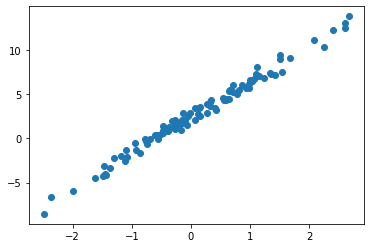

In [30]:
plt.plot(df.x, df.y,'o')

In [31]:
torch.tensor(df.x)

tensor([-2.4821, -2.3621, -1.9973, -1.6239, -1.4792, -1.4635, -1.4509, -1.4435,
        -1.3722, -1.3079, -1.1904, -1.1092, -1.1054, -1.0875, -0.9469, -0.9319,
        -0.8643, -0.7858, -0.7549, -0.7421, -0.6948, -0.6103, -0.5830, -0.5621,
        -0.5506, -0.5058, -0.4806, -0.4738, -0.4710, -0.4676, -0.3874, -0.3719,
        -0.3688, -0.3159, -0.2775, -0.2772, -0.2734, -0.2721, -0.2668, -0.2155,
        -0.2000, -0.1816, -0.1708, -0.1565, -0.1448, -0.1361, -0.1057, -0.0603,
        -0.0559, -0.0214,  0.0655,  0.0684,  0.1195,  0.1420,  0.1521,  0.1568,
         0.2646,  0.2656,  0.3157,  0.3220,  0.3461,  0.3984,  0.4190,  0.5443,
         0.5579,  0.5913,  0.6148,  0.6469,  0.6469,  0.6523,  0.6674,  0.7059,
         0.7141,  0.7822,  0.8154,  0.8668,  0.9291,  0.9804,  0.9853,  0.9941,
         1.0376,  1.0393,  1.0697,  1.1024,  1.1126,  1.1532,  1.2289,  1.3403,
         1.3494,  1.4279,  1.4994,  1.5031,  1.5437,  1.6789,  2.0832,  2.2444,
         2.3935,  2.6056,  2.6057,  2.66

float63 숫자 정밀 저장

float30이면 `dtype=torch.float64)`꼬리표가 붙지 않음

```python
_trt = torch.tensor(df.x).float()
_trt = torch.tensor(df.x,dtype=float30)
```
같은 역할, 메모리 적게 쓰기 위해 타입 바꿔주자

```python
x= torch.tensor(df.x,dtype=torch.float32).reshape(100,1)
```
컬럼형식으로 받아주기 위해 변경

In [33]:
x= torch.tensor(df.x,dtype=torch.float32).reshape(100,1)
y= torch.tensor(df.y,dtype=torch.float32).reshape(100,1)
_1= torch.ones([100,1])
X = torch.concat([_1,x],axis=1)

```pyhon
torch.ones([100,1])
torch.tensor([[1]*100,x]).T
```
같은 셋

In [27]:
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
What

tensor([[-5.],
        [10.]], requires_grad=True)

```python
requires_grad=True 
```
reshape 미분 가능 옵션 주기 전에 shape 정해주자

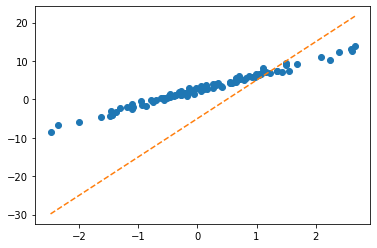

In [35]:
plt.plot(x,y,'o')
#plt.plot(x,-5+10*x,'--')
plt.plot(x,X@What.data,'--')

### ver1: loss = sum of squares error

In [36]:
alpha = 1/1000
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
for epoc in range(30): 
    # step1: yhat 
    yhat = X@What 
    # step2: loss 
    loss = torch.sum((y-yhat)**2)
    # step3: 미분 
    loss.backward()
    # step4: update 
    What.data = What.data - alpha * What.grad 
    What.grad = None # 

In [37]:
What

tensor([[2.4290],
        [4.0144]], requires_grad=True)

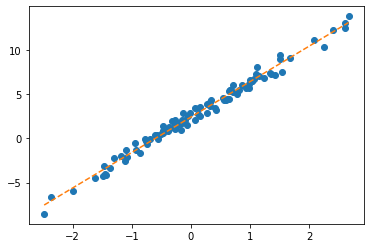

In [38]:
plt.plot(x,y,'o') 
plt.plot(x,X@What.data,'--')

- note: 왜 What = What - alpha*What.grad 는 안되는지?

### ver2: loss = mean squared error = MSE 

In [39]:
alpha = 1/10
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
for epoc in range(30): 
    # step1: yhat 
    yhat = X@What 
    # step2: loss 
    loss = torch.mean((y-yhat)**2)
    # step3: 미분 
    loss.backward()
    # step4: update 
    What.data = What.data - alpha * What.grad 
    What.grad = None # 

In [40]:
What

tensor([[2.4290],
        [4.0144]], requires_grad=True)

mean 정의
- 데이터를 더 효율적으로 학습 가능, 데이터 수만큼 안 해도 돼, 계산 덜 해도 돼

## step1의 다른버전 -- net 설계만

### ver1: net = torch.nn.Linear(1,1,bias=True) 

In [42]:
torch.nn.Linear?

Init signature:
torch.nn.Linear(
    in_features: int,
    out_features: int,
    bias: bool = True,
    device=None,
    dtype=None,
) -> None
Docstring:     
Applies a linear transformation to the incoming data: :math:`y = xA^T + b`

This module supports :ref:`TensorFloat32<tf32_on_ampere>`.

Args:
    in_features: size of each input sample
    out_features: size of each output sample
    bias: If set to ``False``, the layer will not learn an additive bias.
        Default: ``True``

Shape:
    - Input: :math:`(*, H_{in})` where :math:`*` means any number of
      dimensions including none and :math:`H_{in} = \text{in\_features}`.
    - Output: :math:`(*, H_{out})` where all but the last dimension
      are the same shape as the input and :math:`H_{out} = \text{out\_features}`.

Attributes:
    weight: the learnable weights of the module of shape
        :math:`(\text{out\_features}, \text{in\_features})`. The values are
        initialized from :math:`\mathcal{U}(-\sqrt{k}, \sqrt{k}

input 잡는 법
- x의 컬럼 부분을 input이라고 생각하자

In [43]:
x.shape

torch.Size([100, 1])

output 잡는 법
- y의 컬럼 부분을 output이라고 생각하자

In [44]:
y.shape

torch.Size([100, 1])

In [45]:
_net =  torch.nn.Linear(in_features=1, out_features=1, bias=True) 

In [47]:
_net(x).shape

torch.Size([100, 1])

In [52]:
_net.bias # w0

Parameter containing:
tensor([-0.6065], requires_grad=True)

In [53]:
_net.weight # w1

Parameter containing:
tensor([[-0.7280]], requires_grad=True)

In [57]:
torch.manual_seed(43052)
net = torch.nn.Linear(in_features=1, out_features=1, bias=True) 

In [61]:
net.bias, net.weight

(Parameter containing:
 tensor([-0.8470], requires_grad=True),
 Parameter containing:
 tensor([[-0.3467]], requires_grad=True))

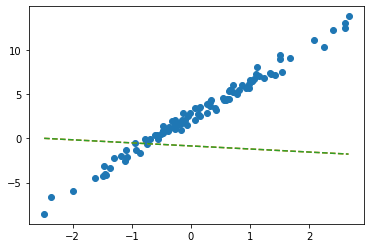

In [63]:
plt.plot(x,y,'o')
plt.plot(x,net(x).data,'--')
w0hat = -0.847
w1hat = -0.3467
plt.plot(x,w0hat+w1hat*x,'--')

출력결과 같음을 확인

`-` net에서 $\hat{w}_0, \hat{w}_1$ 의 값은? 

In [64]:
net.weight # w1 

Parameter containing:
tensor([[-0.3467]], requires_grad=True)

In [65]:
net.bias # w0 

Parameter containing:
tensor([-0.8470], requires_grad=True)

In [66]:
_yhat = -0.8470 + -0.3467*x 

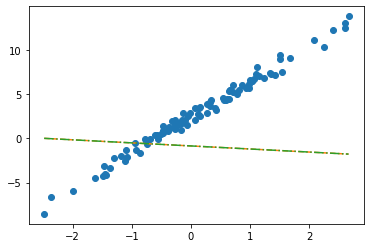

In [67]:
plt.plot(x,y,'o')
plt.plot(x, _yhat,'--')
plt.plot(x,net(x).data,'-.')

`-` 수식표현: $\hat{y}_i = \hat{w}_0 + \hat{w}_1 x_i = \hat{b} + \hat{w}x_i =  -0.8470 + -0.3467 x_i$ for all $i=1,2,\dots,100$. 

### ver2: net = torch.nn.Linear(2,1,bias=False) 

`-` 입력이 x가 아닌 X를 넣고 싶다면? (보통 잘 안하긴 해요, 왜? bias=False로 주는게 귀찮거든요)
- X는 바이어스가 고려된 상황 

In [68]:
net(X) ## 그대로 쓰면 당연히 에러

RuntimeError: mat1 and mat2 shapes cannot be multiplied (100x2 and 1x1)

In [71]:
torch.manual_seed(43052)
net = torch.nn.Linear(in_features=2, out_features=1, bias=False) 

In [73]:
net(X).shape

torch.Size([100, 1])

In [74]:
net.weight

Parameter containing:
tensor([[-0.2451, -0.5989]], requires_grad=True)

위에 $w_0,w_1$ 순

In [75]:
net.bias

bias 없음을 확인

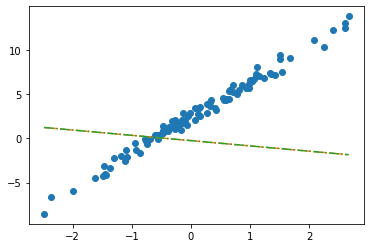

In [77]:
plt.plot(x,y,'o') 
plt.plot(x,net(X).data, '--')
plt.plot(x,X@torch.tensor([[-0.2451],[-0.5989]]), '-.')

`-` 수식표현: $\hat{\bf y} = {\bf X} {\bf \hat W} = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \dots & \dots \\ 1 & x_{100} \end{bmatrix}  \begin{bmatrix} -0.2451 \\ -0.5989  \end{bmatrix}$

### 잘못된사용1

In [78]:
_x = x.reshape(-1)

In [79]:
_x

tensor([-2.4821, -2.3621, -1.9973, -1.6239, -1.4792, -1.4635, -1.4509, -1.4435,
        -1.3722, -1.3079, -1.1904, -1.1092, -1.1054, -1.0875, -0.9469, -0.9319,
        -0.8643, -0.7858, -0.7549, -0.7421, -0.6948, -0.6103, -0.5830, -0.5621,
        -0.5506, -0.5058, -0.4806, -0.4738, -0.4710, -0.4676, -0.3874, -0.3719,
        -0.3688, -0.3159, -0.2775, -0.2772, -0.2734, -0.2721, -0.2668, -0.2155,
        -0.2000, -0.1816, -0.1708, -0.1565, -0.1448, -0.1361, -0.1057, -0.0603,
        -0.0559, -0.0214,  0.0655,  0.0684,  0.1195,  0.1420,  0.1521,  0.1568,
         0.2646,  0.2656,  0.3157,  0.3220,  0.3461,  0.3984,  0.4190,  0.5443,
         0.5579,  0.5913,  0.6148,  0.6469,  0.6469,  0.6523,  0.6674,  0.7059,
         0.7141,  0.7822,  0.8154,  0.8668,  0.9291,  0.9804,  0.9853,  0.9941,
         1.0376,  1.0393,  1.0697,  1.1024,  1.1126,  1.1532,  1.2289,  1.3403,
         1.3494,  1.4279,  1.4994,  1.5031,  1.5437,  1.6789,  2.0832,  2.2444,
         2.3935,  2.6056,  2.6057,  2.66

In [80]:
torch.manual_seed(43052)
net = torch.nn.Linear(in_features=1,out_features=1) 

In [81]:
net(_x)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x100 and 1x1)

```python
net(_x.reshape(100,1))
```
과 같이 정의

### 잘못된사용2

In [83]:
torch.manual_seed(43052)
net = torch.nn.Linear(in_features=2,out_features=1) # bias=False를 깜빡..

In [84]:
net.weight

Parameter containing:
tensor([[-0.2451, -0.5989]], requires_grad=True)

In [85]:
net.bias

Parameter containing:
tensor([0.2549], requires_grad=True)

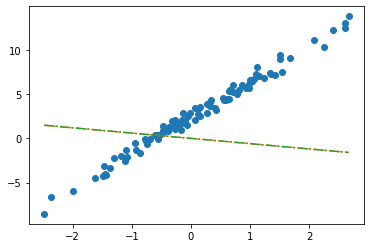

In [86]:
plt.plot(x,y,'o')
plt.plot(x,net(X).data,'--')
plt.plot(x,X@torch.tensor([[-0.2451],[-0.5989]])+0.2549,'-.')

- 수식표현: $\hat{\bf y} = {\bf X} {\bf \hat W} + \hat{b}= \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \dots & \dots \\ 1 & x_{100} \end{bmatrix}  \begin{bmatrix} -0.2451 \\ -0.5989  \end{bmatrix} + 0.2549$

## step1의 다른버전 -- 끝까지 

### ver1: net = torch.nn.Linear(1,1,bias=True) 

`-` 준비

In [87]:
net = torch.nn.Linear(1,1,bias=True)
net.weight.data = torch.tensor([[10.0]])
net.bias.data = torch.tensor([-5.0])
net.weight,net.bias

(Parameter containing:
 tensor([[10.]], requires_grad=True),
 Parameter containing:
 tensor([-5.], requires_grad=True))

`-` step1 

In [88]:
yhat = net(x) 

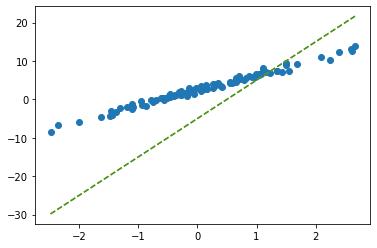

In [91]:
plt.plot(x,y,'o')
plt.plot(x,net(x).data,'--')
plt.plot(x,-5+10*x,'--')

`-` step2

In [92]:
loss = torch.mean((y-yhat)**2)

`-` step3

(미분전)

In [93]:
net.bias,net.weight

(Parameter containing:
 tensor([-5.], requires_grad=True),
 Parameter containing:
 tensor([[10.]], requires_grad=True))

In [94]:
net.bias.grad, net.weight.grad

(None, None)

(미분)

In [95]:
loss.backward()

(미분후)

In [96]:
net.bias,net.weight

(Parameter containing:
 tensor([-5.], requires_grad=True),
 Parameter containing:
 tensor([[10.]], requires_grad=True))

In [97]:
net.bias.grad,net.weight.grad

(tensor([-13.4225]), tensor([[11.8893]]))

`-` step4 

(업데이트전) 

In [98]:
net.bias,net.weight

(Parameter containing:
 tensor([-5.], requires_grad=True),
 Parameter containing:
 tensor([[10.]], requires_grad=True))

In [99]:
net.bias.grad, net.weight.grad

(tensor([-13.4225]), tensor([[11.8893]]))

(업데이트) 

In [100]:
net.bias.data = net.bias.data - 0.1*net.bias.grad 
net.weight.data = net.weight.data - 0.1*net.weight.grad 

In [101]:
net.bias.grad = None 
net.weight.grad = None 

(업데이트후) 

In [102]:
net.bias,net.weight

(Parameter containing:
 tensor([-3.6577], requires_grad=True),
 Parameter containing:
 tensor([[8.8111]], requires_grad=True))

In [103]:
net.bias.grad, net.weight.grad

(None, None)

`-` 반복 

In [104]:
net = torch.nn.Linear(1,1)
net.weight.data = torch.tensor([[10.0]])
net.bias.data = torch.tensor([-5.0])

In [105]:
for epoc in range(30):
    yhat = net(x) 
    loss = torch.mean((y-yhat)**2)
    loss.backward()
    net.weight.data = net.weight.data - 0.1*net.weight.grad
    net.bias.data = net.bias.data - 0.1*net.bias.grad
    net.weight.grad = None
    net.bias.grad = None

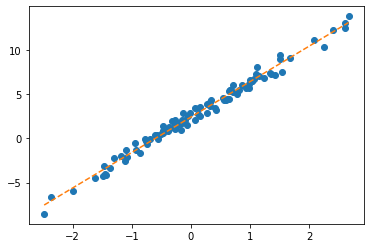

In [106]:
plt.plot(x,y,'o')
plt.plot(x,net(x).data,'--')

### ver2: net = torch.nn.Linear(2,1,bias=False) 

`-` 준비

In [107]:
net = torch.nn.Linear(2,1,bias=False)
net.weight.data = torch.tensor([[-5.0, 10.0]])

`-` step1

In [108]:
yhat = net(X)

`-` step2

In [109]:
loss = torch.mean((y-yhat)**2)

`-` step3

(미분전) 

In [110]:
net.weight

Parameter containing:
tensor([[-5., 10.]], requires_grad=True)

In [111]:
net.weight.grad

(미분)

In [112]:
loss.backward()

(미분후)

In [113]:
net.weight

Parameter containing:
tensor([[-5., 10.]], requires_grad=True)

In [114]:
net.weight.grad

tensor([[-13.4225,  11.8893]])

`-` step4

(업데이트전) 

In [115]:
net.weight

Parameter containing:
tensor([[-5., 10.]], requires_grad=True)

In [116]:
net.weight.grad

tensor([[-13.4225,  11.8893]])

(업데이트)

In [117]:
net.weight.data = net.weight.data - 0.1*net.weight.grad

In [118]:
net.weight.grad = None

(업데이트후)

In [119]:
net.weight

Parameter containing:
tensor([[-3.6577,  8.8111]], requires_grad=True)

In [120]:
net.weight.grad

`-` 반복

In [121]:
net = torch.nn.Linear(2,1,bias=False)
net.weight.data = torch.tensor([[-5.0, 10.0]])

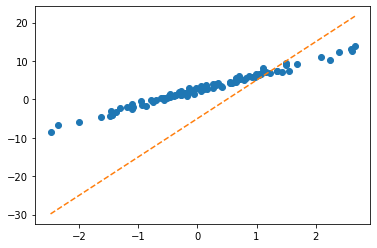

In [122]:
plt.plot(x,y,'o')
plt.plot(x,net(X).data,'--')

In [123]:
for epoc in range(30):
    yhat = net(X) 
    loss = torch.mean((y-yhat)**2)
    loss.backward()
    net.weight.data = net.weight.data - 0.1*net.weight.grad
    net.weight.grad = None

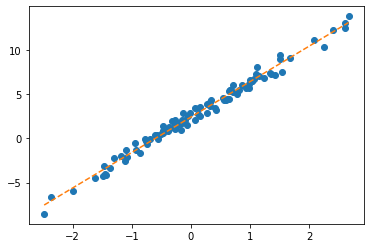

In [124]:
plt.plot(x,y,'o')
plt.plot(x,net(X).data,'--')

## step4의 다른버전: 옵티마이저!

### ver1: net = torch.nn.Linear(1,1,bias=True) 

`-` 준비 

In [126]:
net = torch.nn.Linear(1,1) 
net.weight.data = torch.tensor([[10.0]]) 
net.bias.data = torch.tensor([[-5.0]]) 

In [127]:
torch.optim.SGD?

Init signature:
torch.optim.SGD(
    params,
    lr=<required parameter>,
    momentum=0,
    dampening=0,
    weight_decay=0,
    nesterov=False,
)
Docstring:     
Implements stochastic gradient descent (optionally with momentum).

.. math::
   \begin{aligned}
        &\rule{110mm}{0.4pt}                                                                 \\
        &\textbf{input}      : \gamma \text{ (lr)}, \: \theta_0 \text{ (params)}, \: f(\theta)
            \text{ (objective)}, \: \lambda \text{ (weight decay)},                          \\
        &\hspace{13mm} \:\mu \text{ (momentum)}, \:\tau \text{ (dampening)},\:nesterov\\[-1.ex]
        &\rule{110mm}{0.4pt}                                                                 \\
        &\textbf{for} \: t=1 \: \textbf{to} \: \ldots \: \textbf{do}                         \\
        &\hspace{5mm}g_t           \leftarrow   \nabla_{\theta} f_t (\theta_{t-1})           \\
        &\hspace{5mm}\textbf{if} \: \lambda \neq 0                 

Stocastic Gradiant Decscent

In [128]:
net.parameters()

<generator object Module.parameters at 0x7f6c30d49c10>

In [129]:
optimizr = torch.optim.SGD(net.parameters(),lr=1/10) 

`-` step1~3

In [130]:
yhat = net(x)     

In [131]:
loss = torch.mean((y-yhat)**2) 

In [132]:
loss.backward() 

`-` step4 

(update 전)

In [133]:
net.weight.data, net.bias.data ## 값은 업데이트 전

(tensor([[10.]]), tensor([[-5.]]))

In [134]:
net.weight.grad, net.bias.grad ## 미분값은 청소전 

(tensor([[11.8893]]), tensor([[-13.4225]]))

(update) 

In [135]:
optimizr.step() 
optimizr.zero_grad() 

(update 후) 

In [136]:
net.weight.data, net.bias.data ## 값은 업데이트 되었음 

(tensor([[8.8111]]), tensor([[-3.6577]]))

In [137]:
net.weight.grad, net.bias.grad ## 미분값은 0으로 초기화하였음 

(tensor([[0.]]), tensor([[0.]]))

`-` 반복 

In [143]:
net = torch.nn.Linear(1,1) 
net.weight.data = torch.tensor([[10.0]])
net.bias.data = torch.tensor([-5.0])
optimizr = torch.optim.SGD(net.parameters(),lr=1/10) 

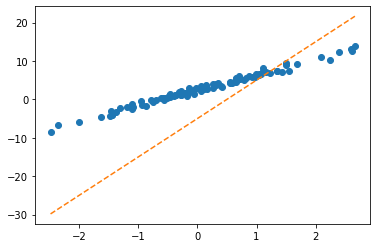

In [144]:
plt.plot(x,y,'o')
plt.plot(x,net(x).data,'--')

In [145]:
for epoc in range(30): 
    yhat = net(x)
    loss = torch.mean((y-yhat)**2) 
    loss.backward() 
    optimizr.step(); optimizr.zero_grad() 

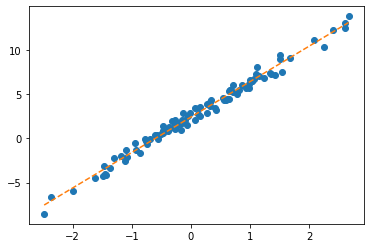

In [146]:
plt.plot(x,y,'o')
plt.plot(x,net(x).data,'--')

### ver2: net = torch.nn.Linear(2,1,bias=False) 

`-` 바로 반복하겠습니다.. 

In [150]:
net = torch.nn.Linear(2,1,bias=False) 
net.weight.data = torch.tensor([[-5.0, 10.0]])
optimizr = torch.optim.SGD(net.parameters(),lr=1/10) 

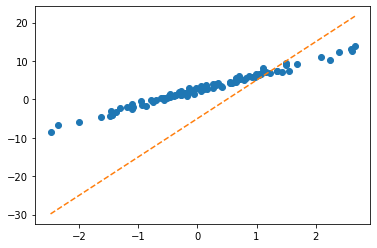

In [151]:
plt.plot(x,y,'o')
plt.plot(x,net(X).data,'--')

In [152]:
for epoc in range(30): 
    yhat = net(X)
    loss = torch.mean((y-yhat)**2) 
    loss.backward() 
    optimizr.step(); optimizr.zero_grad() 

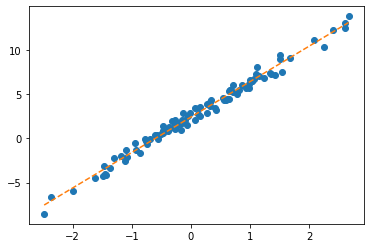

In [153]:
plt.plot(x,y,'o')
plt.plot(x,net(X).data,'--')

--- 

## Appendix: `net.parameters()`의 의미? (선택학습)

`-` iterator, generator의 개념필요 
- https://guebin.github.io/IP2022/2022/06/06/(14주차)-6월6일.html, 클래스공부 8단계 참고 


`-` 탐구시작: 네트워크 생성 

In [ ]:
net = torch.nn.Linear(in_features=1,out_features=1)
net.weight

Parameter containing:
tensor([[-0.1656]], requires_grad=True)

In [ ]:
net.bias

Parameter containing:
tensor([0.8529], requires_grad=True)

`-` torch.optim.SGD? 를 확인하면 params에 대한설명에 아래와 같이 되어있음 

```
params (iterable): iterable of parameters to optimize or dicts defining
        parameter groups
```

`-` 설명을 읽어보면 params에 iterable object를 넣으라고 되어있음 (iterable object는 숨겨진 명령어로 `__iter__`를 가지고 있는 오브젝트를 의미)

In [ ]:
set(dir(net.parameters)) & {'__iter__'}

set()

In [ ]:
set(dir(net.parameters())) & {'__iter__'}

{'__iter__'}

`-` 무슨의미? 

In [ ]:
_generator = net.parameters()

In [ ]:
_generator.__next__()

Parameter containing:
tensor([[-0.1656]], requires_grad=True)

In [ ]:
_generator.__next__()

Parameter containing:
tensor([0.8529], requires_grad=True)

In [ ]:
_generator.__next__()

StopIteration: 

`-` 이건 이런느낌인데? 

In [ ]:
_generator2 = iter([net.weight,net.bias])

In [ ]:
_generator2

In [ ]:
_generator2.__next__()

Parameter containing:
tensor([[-0.1656]], requires_grad=True)

In [ ]:
_generator2.__next__()

Parameter containing:
tensor([0.8529], requires_grad=True)

In [ ]:
_generator2.__next__()

StopIteration: 

`-` 즉 아래는 같은코드이다. 

```python
### 코드1
_generator = net.parameters() 
torch.optim.SGD(_generator,lr=1/10) 
### 코드2
_generator = iter([net.weight,net.bias])
torch.optim.SGD(_generator,lr=1/10) 
### 코드3 (이렇게 써도 코드2가 실행된다고 이해할 수 있음)
_iterator = [net.weight,net.bias]
torch.optim.SGD(_iterator,lr=1/10) 
```

결론: `net.parameters()`는 net오브젝트에서 학습할 파라메터를 모두 모아 리스트(iterable object)로 만드는 함수라 이해할 수 있다. 

`-` 응용예제1

In [ ]:
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
optimizr = torch.optim.SGD([What],lr=1/10) 

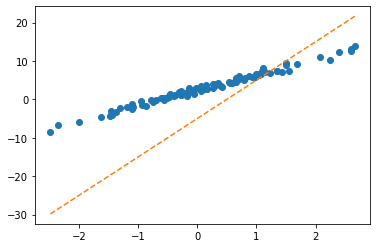

In [ ]:
plt.plot(x,y,'o')
plt.plot(x,(X@What).data,'--')

In [ ]:
for epoc in range(30):
    yhat = X@What 
    loss = torch.mean((y-yhat)**2)
    loss.backward()
    optimizr.step();optimizr.zero_grad() 

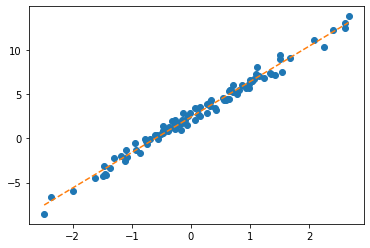

In [ ]:
plt.plot(x,y,'o')
plt.plot(x,(X@What).data,'--')

`-` 응용예제2

In [ ]:
b = torch.tensor(-5.0,requires_grad=True)
w = torch.tensor(10.0,requires_grad=True)
optimizr = torch.optim.SGD([b,w],lr=1/10)

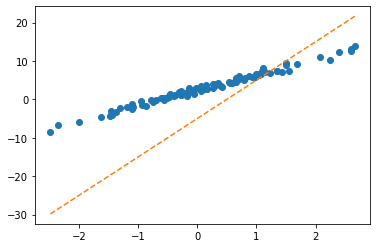

In [ ]:
plt.plot(x,y,'o')
plt.plot(x,(w*x+b).data,'--')

In [ ]:
for epoc in range(30):
    yhat = b+ w*x 
    loss = torch.mean((y-yhat)**2)
    loss.backward()
    optimizr.step(); optimizr.zero_grad()

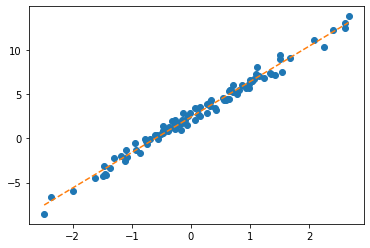

In [ ]:
plt.plot(x,y,'o')
plt.plot(x,(w*x+b).data,'--')

## Logistic regression 

### motive 

`-` 현실에서 이런 경우가 많음 
- $x$가 커질수록 (혹은 작아질수록) 성공확률이 증가함. 

`-` (X,y)는 어떤모양? 

In [154]:
_df = pd.DataFrame({'x':range(-6,7),'y':[0,0,0,0,0,0,1,0,1,1,1,1,1]})
_df 

,x,y
0,-6,0
1,-5,0
2,-4,0
3,-3,0
4,-2,0
5,-1,0
6,0,1
7,1,0
8,2,1
9,3,1


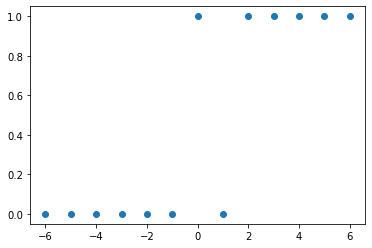

In [155]:
plt.plot(_df.x,_df.y,'o')

`-` (예비학습) 시그모이드라는 함수가 있음 

In [156]:
xx = torch.linspace(-6,6,100)
def f(x):
    return torch.exp(x)/(1+torch.exp(x))

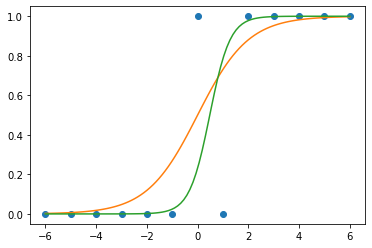

In [166]:
plt.plot(_df.x,_df.y,'o')
plt.plot(xx,f(xx))
plt.plot(xx,f(2.5*xx-1.2)) # 영향을 크게 받을 때 + 운적인 요소 영향 받을 때(절편) -> 모델링하는 과정

베르누이 특정 확률로 0 또는 1 뽑기

### model

`-` $x$가 커질수록 $y=1$이 잘나오는 모형은 아래와 같이 설계할 수 있음 <--- 외우세요!!!

- $y_i \sim Ber(\pi_i),\quad $ where $\pi_i = \frac{\exp(w_0+w_1x_i)}{1+\exp(w_0+w_1x_i)}$

- $\hat{y}_i= \hat{pi}_\frac{\exp(\hat{w}_0+\hat{w}_1x_i)}{1+\exp(\hat{w}_0+\hat{w}_1x_i)}=\frac{1}{1+\exp(-\hat{w}_0-\hat{w}_1x_i)}$ 

- $loss= - \sum_{i=1}^{n} \big(y_i\log(\hat{y}_i)+(1-y_i)\log(1-\hat{y}_i)\big)$ <--- 외우세요!!

$y_i=1$ $\hat{y_i} = 1$loss가 0 근처 $\hat{y_i} = 0$ loss가- 무한대

$y_i = 0$ $\hat{y_i} = 0 $loss가 0근처 $\hat{y_i} = 1$ loss가 1

### toy example

`-` 예제시작 

In [167]:
torch.bernoulli?

Docstring:
bernoulli(input, *, generator=None, out=None) -> Tensor

Draws binary random numbers (0 or 1) from a Bernoulli distribution.

The :attr:`input` tensor should be a tensor containing probabilities
to be used for drawing the binary random number.
Hence, all values in :attr:`input` have to be in the range:
:math:`0 \leq \text{input}_i \leq 1`.

The :math:`\text{i}^{th}` element of the output tensor will draw a
value :math:`1` according to the :math:`\text{i}^{th}` probability value given
in :attr:`input`.

.. math::
    \text{out}_{i} \sim \mathrm{Bernoulli}(p = \text{input}_{i})

The returned :attr:`out` tensor only has values 0 or 1 and is of the same
shape as :attr:`input`.

:attr:`out` can have integral ``dtype``, but :attr:`input` must have floating
point ``dtype``.

Args:
    input (Tensor): the input tensor of probability values for the Bernoulli distribution

Keyword args:
    generator (:class:`torch.Generator`, optional): a pseudorandom number generator for sampling
  

In [169]:
torch.bernoulli(torch.tensor([0.5]*100)) # 0.5의 확률ㄹ 0 또는 1 뽑아

tensor([0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
        0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
        0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
        0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
        1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [190]:
x=torch.linspace(-1,1,2000).reshape(2000,1)
w0= -1 
w1= 5 
u = w0+x*w1 
v = torch.exp(u)/(1+torch.exp(u)) # v=πi, 즉 확률을 의미함
y = torch.bernoulli(v) 

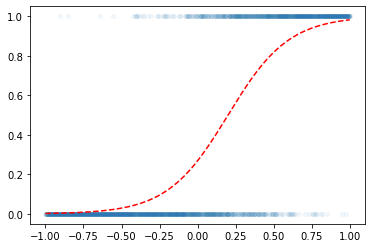

In [191]:
#plt.scatter(x,y,alpha=0.05)
plt.plot(x,y,'o',alpha=0.05,ms=4)
plt.plot(x,v,'--r')

- 우리의 목적: $x$가 들어가면 빨간선 $\hat{y}$의 값을 만들어주는 mapping을 학습해보자. 

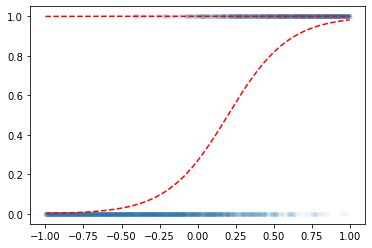

In [194]:
w0hat = 10
w1hat = 3
yhat = f(w0hat + w1hat*x)
plt.plot(x,y,'o',alpha=0.05,ms=4)
plt.plot(x,v,'--r')
plt.plot(x,yhat,'--r')

In [195]:
l1 = torch.nn.Linear(1,1)

In [207]:
l1.bias.data = torch.tensor([-1.0])
l1.weight.data = torch.tensor([[1.0]])

In [208]:
a1 = torch.nn.Sigmoid()

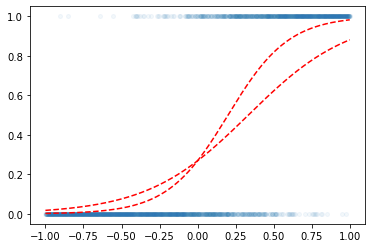

In [209]:
w0hat = -1
w1hat = 3
yhat = a1(w0hat + w1hat*x)
plt.plot(x,y,'o',alpha=0.05,ms=4)
plt.plot(x,v,'--r')
plt.plot(x,yhat,'--r')

In [210]:
for epoc in range(6000):
    ## step1 
    yhat = a1(l1(x))
    ## step2 
    loss = torch.mean((y-yhat)**2) ## loss 를 원래 이렇게 하는건 아니에요.. 
    ## step3 
    loss.backward()
    ## step4 
    l1.bias.data = l1.bias.data - 0.1 * l1.bias.grad 
    l1.weight.data = l1.weight.data - 0.1 * l1.weight.grad 
    l1.bias.grad = None 
    l1.weight.grad = None 

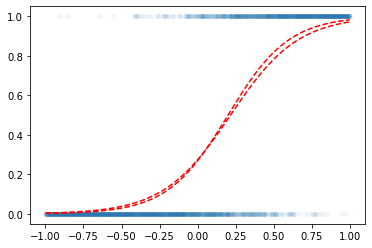

In [212]:
plt.plot(x,y,'o',alpha=0.05,ms=4)
plt.plot(x,v,'--r')
plt.plot(x,a1(l1(x)).data,'--r')

---

## 숙제 